# Climate Analysis and Exploration
Use Python and SQLAlchemy to do basic climate analysis and data exploration of your climate database. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

#### Choose a Start and End date for the trip in range of 3-15 days total.
#### Use SQL Alchemy to connect to the sqlite database

### Precipitation Analysis
### Station Analysis
### Climate App using Flask API
#### Create separate app.py file for this analysis

## Bonus
### Temperature Analysis I
### Temperature Analysis II
### Daily Average Rainfall

In [1]:
# Import dependencies
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, MetaData, Table, Column, ForeignKey, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Display the structure of the table - "Measurement"
Measurement.__table__

Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None)

In [11]:
# Display the first row of the table - "Measurement"
measurement_first_row = session.query(Measurement).first()
measurement_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c0f870b5b0>,
 'id': 1,
 'tobs': 65.0,
 'prcp': 0.08,
 'date': '2010-01-01',
 'station': 'USC00519397'}

In [12]:
# Display the structure of the table - "Station"
Station.__table__

Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)

In [13]:
# Display the first row of the table - "Station"
station_first_row = session.query(Station).first()
station_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c0f86dd520>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [14]:
# Get the tables in the SQLLite DB using inspect SQLAlchemy method.
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [15]:
# Display the colkumn names of the table instance "measurement"
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"], c["nullable"], c["default"], c["autoincrement"], c["primary_key"])

id INTEGER False None auto 1
station TEXT True None auto 0
date TEXT True None auto 0
prcp FLOAT True None auto 0
tobs FLOAT True None auto 0


In [16]:
# Display the colkumn names of the table instance "station"
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"], c["nullable"], c["default"], c["autoincrement"], c["primary_key"])

id INTEGER False None auto 1
station TEXT True None auto 0
name TEXT True None auto 0
latitude FLOAT True None auto 0
longitude FLOAT True None auto 0
elevation FLOAT True None auto 0


# Exploratory Climate Analysis

In [17]:
# Calculate the date 1 year ago from the last data point in the database
#  Calculate the "max date" in the Measurement Table
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date a year before (this date will be used to get all the records gretaer than the date)
previous_year_date = (dt.datetime.strptime(max_date[0], '%Y-%m-%d').date() - relativedelta(years=1)).isoformat()

print(f'     The Max date is: {max_date[0]}\nThe Year ago date is: {previous_year_date}')

     The Max date is: 2017-08-23
The Year ago date is: 2016-08-23


In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#  Perform a query to retrieve the data and precipitation scores
measurement_result = session.query( Measurement.date, Measurement.prcp)           \
                                  .filter(Measurement.date >= previous_year_date) \
                                  .order_by(Measurement.date.desc(), Measurement.station.desc()) \
                                  .all()

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column.
#  Only include the columns 'date' and 'prcp' from the measurement_result and
#  rename the columns to 'Date' and 'Precipitaton' into the 'precipitation_df' DataFrame
precipitation_df = pd.DataFrame(measurement_result, columns=['Date', 'Precipitation'])
# Set the Index to "date" and persist the change.
precipitation_df = precipitation_df.set_index('Date')

# Sort the dataframe by date and persist the modified data.
precipitation_df = precipitation_df.sort_values(by=['Date'], ascending=True)

# Drop the records with NaN in Precipitation column and persist the modified data.
precipitation_df = precipitation_df.dropna()
precipitation_df.head()

,Precipitation
Date,
2016-08-23,0.15
2016-08-23,0.02
2016-08-23,0.00
2016-08-23,0.05
2016-08-23,0.70


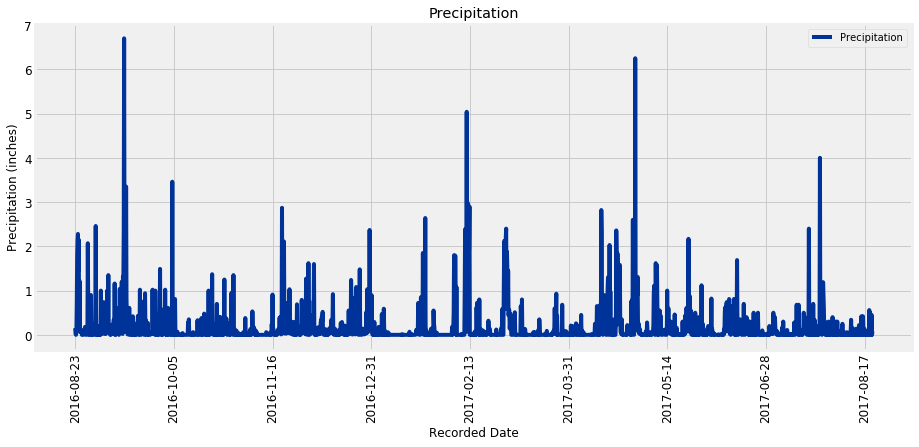

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = precipitation_df.plot( figsize=(14,6)
                           ,title='Precipitation'
                           ,grid=True
                           ,color='#003399'
                           ,rot='90'
                           ,fontsize=12
) 

ax.set_xlabel('Recorded Date') 
ax.set_ylabel('Precipitation (inches)') 
ax.legend(['Precipitation'])

# Save the generated plot to an image file
plt.savefig( './output/fig01-precipitation.png'
            ,format='png'
            ,bbox_inches='tight'
            ,dpi=300
)  

In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(f"Summary Statistics of the Precipitation data:\n\n {precipitation_df.describe()}") 

Summary Statistics of the Precipitation data:

        Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


#  Station Analysis

In [22]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Measurement.station).distinct()      \
                             .group_by(Measurement.station).count()

print(f'Total number of stations are: \033[1m{station_count}\033[0m')

Total number of stations are: 9


In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# Which station has the highest number of observations?

station_result = session.query(Measurement.station, func.count(Measurement.station)) \
                              .group_by(Measurement.station)                         \
                              .order_by(func.count(Measurement.station).desc())      \
                              .all()

# Print out the list of Stations in descending order of the activity count
#  from the Measurement table that recorded the data
i=0
print(f'#  Station Name  Count\n{"-"*22}')
for station in station_result:
    i +=1
    print(f'{i}.  {station[0]}  {station[1]:5,}')
    
# Print the name of the most active station and the counts of records    
print(f"\nThe most active station\'s name is \033[1m{station_result[0][0]}\033[0m \
and recorded \033[1m{station_result[0][1]:,}\033[0m readings.")

#  Station Name  Count
----------------------
1.  USC00519281  2,772
2.  USC00519397  2,724
3.  USC00513117  2,709
4.  USC00519523  2,669
5.  USC00516128  2,612
6.  USC00514830  2,202
7.  USC00511918  1,979
8.  USC00517948  1,372
9.  USC00518838    511

The most active station's name is USC00519281 and recorded 2,772 readings.


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station2_result = session.query( (Measurement.station).label("Station")       \
                                ,func.min(Measurement.tobs).label("Min Temp") \
                                ,func.max(Measurement.tobs).label("Max Temp") \
                                ,func.avg(Measurement.tobs).label("Avg Temp") \
                               )                                              \
                                .filter(Measurement.station==f'{station_result[0][0]}') \
                                .group_by(Measurement.station)                          \
                                .all()
print(f'\033[1mTemperature recorded by the Specified Station - {station_result[0][0]}.\n')
print('\033[1m    Station  --Temperature (°F)--')
print('       Name    Min    Max    Avg ')
print(f'{"-"*33}\033[0m')
print(f'{station2_result[0][0]}  {station2_result[0][1]:.2f}  {station2_result[0][2]:.2f}  {station2_result[0][3]:.2f}')


Temperature recorded by the Specified Station - USC00519281.

    Station  --Temperature (°F)--
       Name    Min    Max    Avg 
---------------------------------
USC00519281  54.00  85.00  71.66


In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station3_result = session.query( (Measurement.station).label("Station")  \
                                ,(Measurement.tobs).label("Temperature") \
                               )                                         \
                                .filter(Measurement.date >= previous_year_date) \
                                .order_by( Measurement.station.desc()           \
                                          ,Measurement.date.desc()              \
                                )                                               \
                                 .all()

# Create a Pandas DataFrame from the above result set
station_temp_df = pd.DataFrame(station3_result, columns=['Station', 'Temperature'])
station_temp_df = station_temp_df.set_index('Station')
station_temp_df.head()

,Temperature
Station,
USC00519523,82.0
USC00519523,82.0
USC00519523,82.0
USC00519523,85.0
USC00519523,83.0


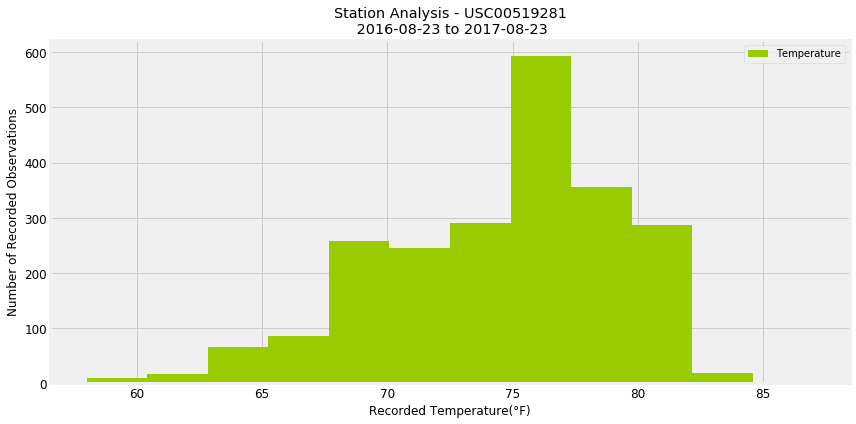

In [26]:
# Plot the temperature data from the Station # USC00519523 as Temperature Histogram
ax2 = station_temp_df.plot.hist( bins=12
                                ,figsize=(12,6)
                                ,grid=True
                                ,color='#99cc00'
                                ,fontsize=12
) 

# Calculate the min and max temp for the 'precipitation_df' created earlier
# this will be used to create the date for the figure Title
start_date = precipitation_df.index.min()
end_date = precipitation_df.index.max()
analyzed_station = station_result[0][0]
ax2.set_title(f'Station Analysis - {analyzed_station}\n {start_date} to {end_date}')
ax2.legend(['Temperature'])

ax2.set_xlabel('Recorded Temperature(°F)') 
ax2.set_ylabel('Number of Recorded Observations') 
plt.tight_layout()

# Save the generated plot to an image file
plt.savefig( './output/fig02-station_temperature.png'
            ,format='png'
            ,bbox_inches='tight'
            ,dpi=300
) 

## Bonus Challenge Assignment

In [27]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query( func.min(Measurement.tobs) \
                         ,func.avg(Measurement.tobs) \
                         ,func.max(Measurement.tobs) \
                        )                            \
                        .filter(Measurement.date >= start_date) \
                        .filter(Measurement.date <= end_date)   \
                        .all()                                  \

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [28]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

trip_arrive_dt = dt.date(2017, 4, 1)
trip_leave_dt = dt.date(2017, 4, 15)
last_year_dt = dt.timedelta(days=365)

last_year_avg_temp = (calc_temps((trip_arrive_dt-last_year_dt), (trip_leave_dt-last_year_dt)))

# Print out the results of the calculation
print(f'Temperature analysis for the trip from \033[1m{trip_arrive_dt} to {trip_leave_dt}\033[0m \
based on prior year\'s data is:\n \
Min Temp: {last_year_avg_temp[0][0]:.2f}°F \n \
Max Temp: {last_year_avg_temp[0][2]:.2f}°F \n \
Avg Temp: {last_year_avg_temp[0][1]:.2f}°F')

Temperature analysis for the trip from 2017-04-01 to 2017-04-15 based on prior year's data is:
 Min Temp: 65.00°F 
 Max Temp: 79.00°F 
 Avg Temp: 73.41°F


In [29]:
# Create a Dataframe from the list value created in eth above cell
trip_avg_temp_df = pd.DataFrame(last_year_avg_temp, columns=['Min Temp', 'Avg Temp', 'Max Temp'], index=['Trip'])
trip_avg_temp_df

,Min Temp,Avg Temp,Max Temp
Trip,65.0,73.410526,79.0


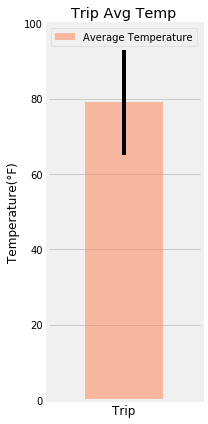

In [30]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

tmax = trip_avg_temp_df['Max Temp'][0]
tmin = trip_avg_temp_df['Min Temp'][0]
yerr = (tmax - tmin)

fig03, ax = plt.subplots(figsize=(3,6))
xpos = 1

bar = ax.bar( xpos
             ,tmax
             ,yerr=yerr
             ,alpha=0.5
             ,color='coral'
             ,align='center'
)

ax.set( xticks=range(xpos)
       ,title='Trip Avg Temp'
       ,ylabel='Temperature(°F)'
       ,ylim=(0,100)
       ,xlabel='Trip'
)       

ax.margins(.5, .2)
ax.legend(['Average Temperature'])
fig03.tight_layout()

# Save the generated plot to an image file
plt.savefig( './output/fig03-trip_average_temperature.png'
            ,format='png'
            ,bbox_inches='tight'
            ,dpi=300
)

In [31]:
# Calculate the total amount of rainfall per weather station for your
# trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and 
# list the station, name, latitude, longitude, and elevation

# Trip dates
trip_start_date = '2017-04-01'
trip_end_date = '2017-04-15'

rain_result = session.query( Station.station            \
                            ,Station.name               \
                            ,Station.latitude           \
                            ,Station.longitude          \
                            ,Station.elevation          \
                            ,func.sum(Measurement.prcp) \
                           )                            \
                            .filter(Measurement.station == Station.station) \
                            .filter(Measurement.date >= trip_start_date)    \
                            .filter(Measurement.date <= trip_end_date)      \
                            .group_by(Station.name)                         \
                            .order_by( func.sum(Measurement.prcp).desc())   \
                            .all()
print(rain_result)

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 5.75), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 4.14), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.64), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.8999999999999999), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.36), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.27), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0)]


In [32]:
# Save the query results as a Pandas DataFrame and set the index to the column 
# 'Station'. The data is already sorted by the 'Total Rain' in descending order.
rain_df = pd.DataFrame( rain_result
                       ,columns=[ 'Station', 'Name', 'Latitude'           \
                                 ,'Longitude', 'Elevation', 'Total Rain']
                       ,index=[1,2,3,4,5,6,7]
)

# Print the results of the query
print(f'#  Station ID  Station Name                           \
Latitude(°)  Longitude(°) Elevation(ft)  Total Rain(in)')
print(f'{"-"*109}')
for index, row in rain_df.iterrows():
    print(f"{index}. {row['Station']} {row['Name']:<39} {row['Latitude']:>10.5f}\
 {row['Longitude']:>13.5f} {row['Elevation']:>13.1f} {row['Total Rain']:>15.2f}")

#  Station ID  Station Name                           Latitude(°)  Longitude(°) Elevation(ft)  Total Rain(in)
-------------------------------------------------------------------------------------------------------------
1. USC00516128 MANOA LYON ARBO 785.2, HI US              21.33310    -157.80250         152.4            5.75
2. USC00519281 WAIHEE 837.5, HI US                       21.45167    -157.84889          32.9            4.14
3. USC00513117 KANEOHE 838.1, HI US                      21.42340    -157.80150          14.6            1.64
4. USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US    21.52130    -157.83740           7.0            0.90
5. USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US        21.33556    -157.71139          19.5            0.36
6. USC00519397 WAIKIKI 717.2, HI US                      21.27160    -157.81680           3.0            0.27
7. USC00517948 PEARL CITY, HI US                         21.39340    -157.97510          11.9            0.00


In [33]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [34]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
trip_start_date = '2017-04-01'
trip_end_date = '2017-04-15'

# Use the start and end date to create a range of dates
trip_date_list = pd.date_range(trip_start_date, trip_end_date, freq='D')

# Stip off the year and save a list of %m-%d strings
trip_month_day_list = trip_date_list.strftime('%m-%d')
trip_month_day_list

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for month_day in trip_month_day_list:
    normals.append(*daily_normals(month_day))
    
normals

[(60.0, 71.87931034482759, 80.0),
 (53.0, 71.82142857142857, 79.0),
 (55.0, 72.2280701754386, 78.0),
 (58.0, 72.01639344262296, 78.0),
 (61.0, 72.28813559322033, 80.0),
 (67.0, 71.57142857142857, 77.0),
 (63.0, 71.10526315789474, 78.0),
 (66.0, 72.10526315789474, 77.0),
 (62.0, 71.6140350877193, 78.0),
 (64.0, 71.40350877192982, 79.0),
 (65.0, 72.49180327868852, 82.0),
 (65.0, 72.22413793103448, 80.0),
 (64.0, 71.52542372881356, 79.0),
 (65.0, 72.75, 81.0),
 (61.0, 71.79310344827586, 79.0)]

In [35]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_date_df = pd.DataFrame(normals, columns=['tmin', 'tavg', 'tmax'])
trip_date_df['Date'] = trip_date_list
trip_date_df.set_index(['Date'], inplace=True)
trip_date_df

,tmin,tavg,tmax
Date,,,
2017-04-01,60.0,71.879310,80.0
2017-04-02,53.0,71.821429,79.0
2017-04-03,55.0,72.228070,78.0
2017-04-04,58.0,72.016393,78.0
2017-04-05,61.0,72.288136,80.0
2017-04-06,67.0,71.571429,77.0
2017-04-07,63.0,71.105263,78.0
2017-04-08,66.0,72.105263,77.0
2017-04-09,62.0,71.614035,78.0


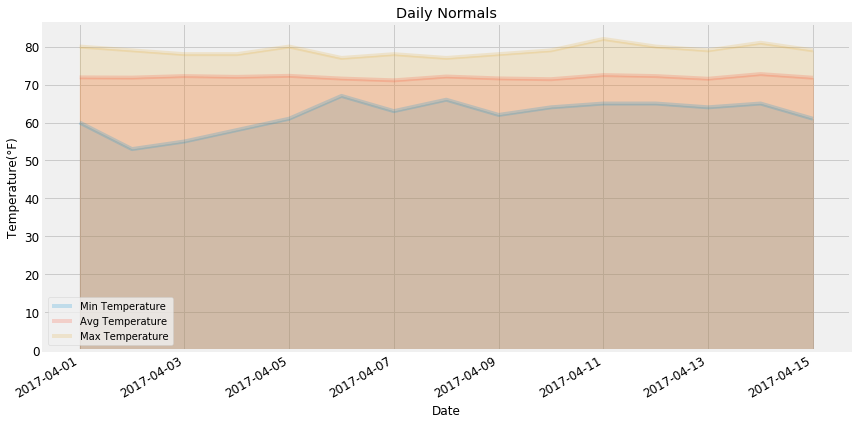

In [36]:
# Plot the daily normals as an area plot with `stacked=False`

ax4 = trip_date_df.plot( kind='area'
                        ,figsize=(12,6)
                        ,grid=True
                        ,stacked=False
                        ,x_compat=True
                        ,alpha=.2
                        ,fontsize=12
)

ax4.set_title(f'Daily Normals')
ax4.set_xlabel('Date') 
ax4.set_ylabel('Temperature(°F)') 
ax4.legend(['Min Temperature', 'Avg Temperature', 'Max Temperature'])
plt.tight_layout()

# Save the generated plot to an image file
plt.savefig( './output/fig04-daily_normals.png'
            ,format='png'
            ,bbox_inches='tight'
            ,dpi=300
) 